<a href="https://colab.research.google.com/github/ashishmission93/Ashish-Autonomous-Vehicles-and-Drones-Projects/blob/main/PROBLEM_6_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking:

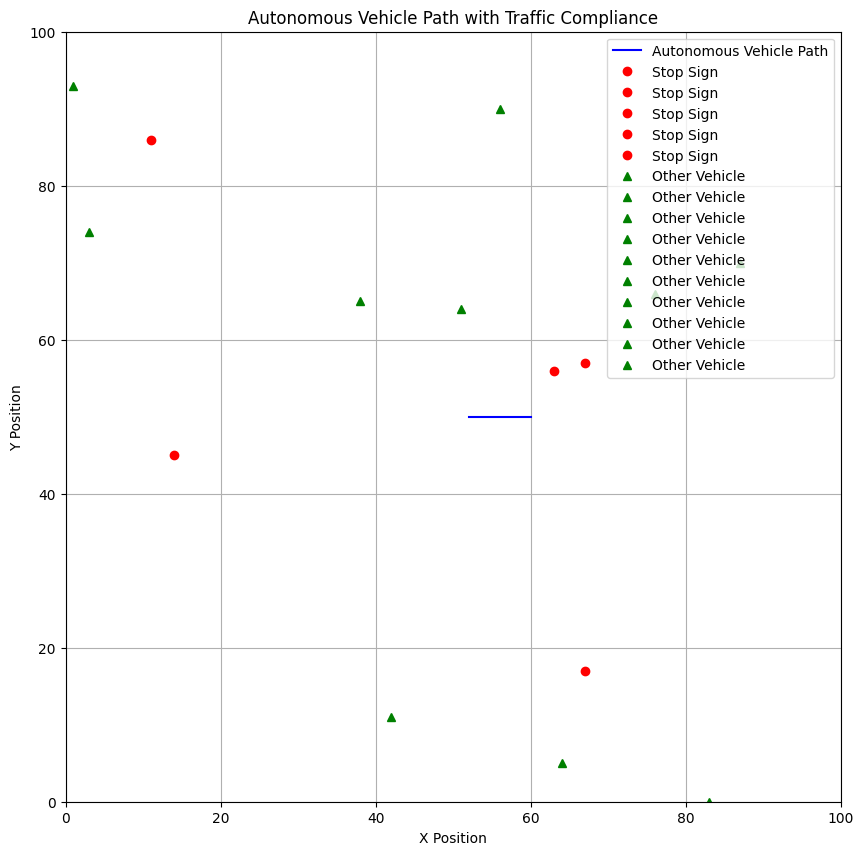

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with basic compliance to traffic rules."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, AutonomousVehicle):
                    # If the object is another vehicle, log its information
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles):
        self.vehicles = []
        self.traffic_signs = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = AutonomousVehicle(position)
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def get_all_objects(self):
        """Return all traffic signs and vehicles in the environment."""
        return self.traffic_signs + self.vehicles

# Initialize the environment with traffic signs and vehicles
environment = UrbanEnvironment(NUM_VEHICLES)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle")

plt.title("Autonomous Vehicle Path with Traffic Compliance")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Braking: stopping the vehicle.
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian ja

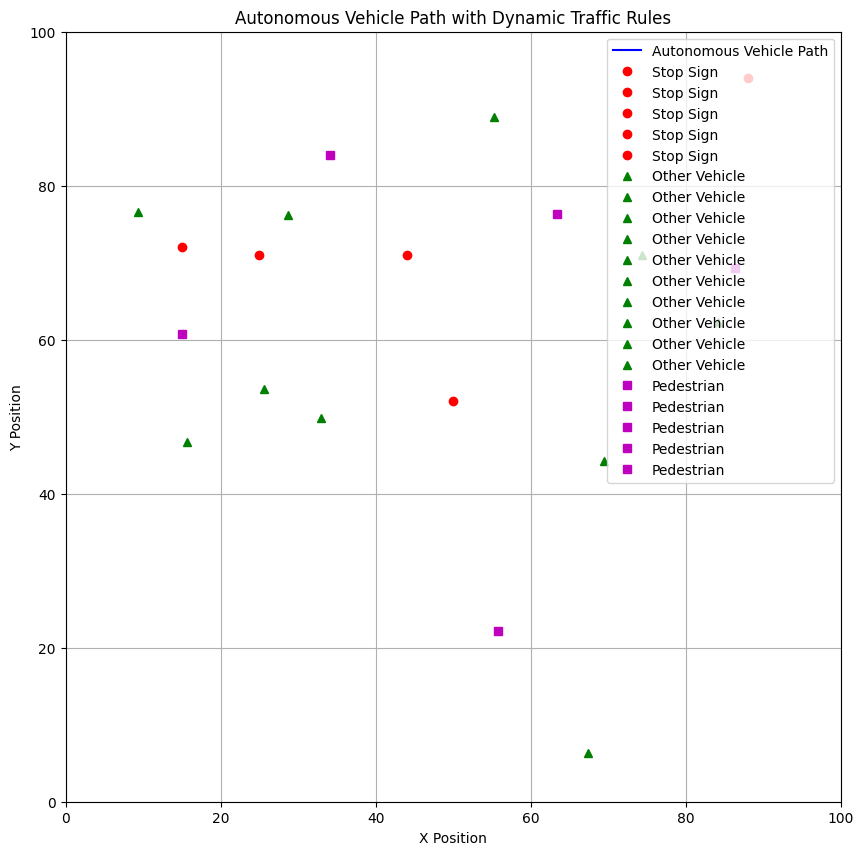

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with basic compliance to traffic rules."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):  # Checking for Vehicle instance
                    # If the object is another vehicle, log its information
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):  # Checking for Pedestrian instance
                    # If the object is a pedestrian, log its information
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:  # Chance to jaywalk
            self.position[0] += uniform(-1, 1)  # Move left or right randomly
            self.position[1] += uniform(-1, 1)  # Move up or down randomly
            print("Pedestrian jaywalking!")
        else:
            # Normal random walk
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)  # Use Vehicle class for traffic vehicles
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()  # Call move_randomly on Vehicle instances

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian")

plt.title("Autonomous Vehicle Path with Dynamic Traffic Rules")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Braking: stopping the vehicle.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Braking: stop

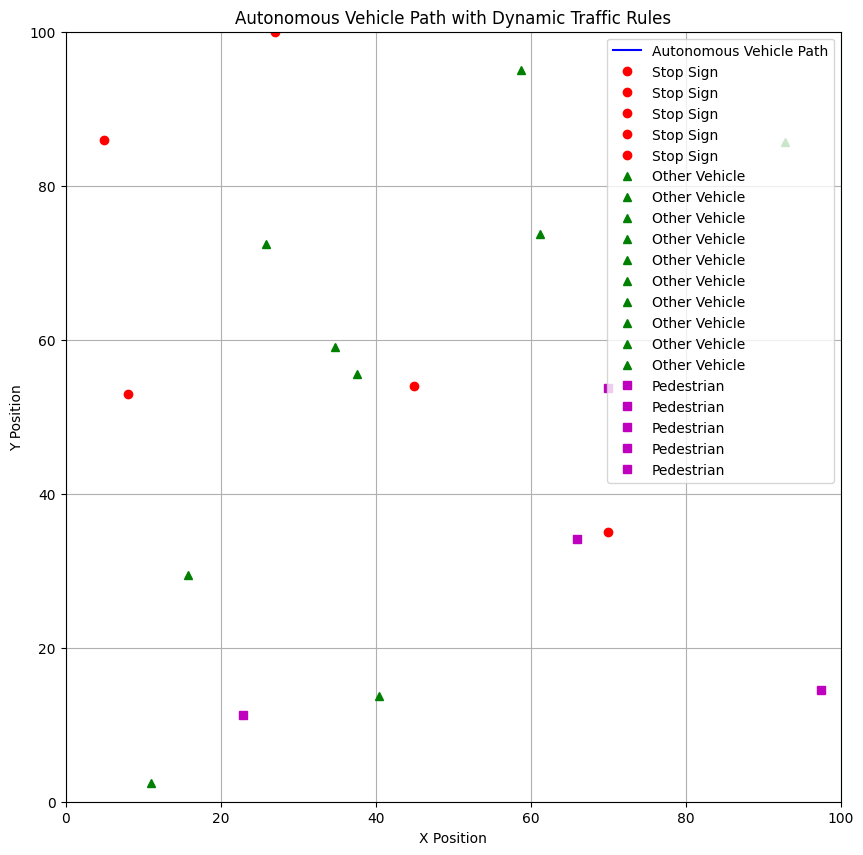

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with basic compliance to traffic rules."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):  # Checking for Vehicle instance
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):  # Checking for Pedestrian instance
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:  # Chance to jaywalk
            self.position[0] += uniform(-1, 1)  # Move left or right randomly
            self.position[1] += uniform(-1, 1)  # Move up or down randomly
            print("Pedestrian jaywalking!")
        else:
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)  # Use Vehicle class for traffic vehicles
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()  # Call move_randomly on Vehicle instances

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian")

plt.title("Autonomous Vehicle Path with Dynamic Traffic Rules")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian 

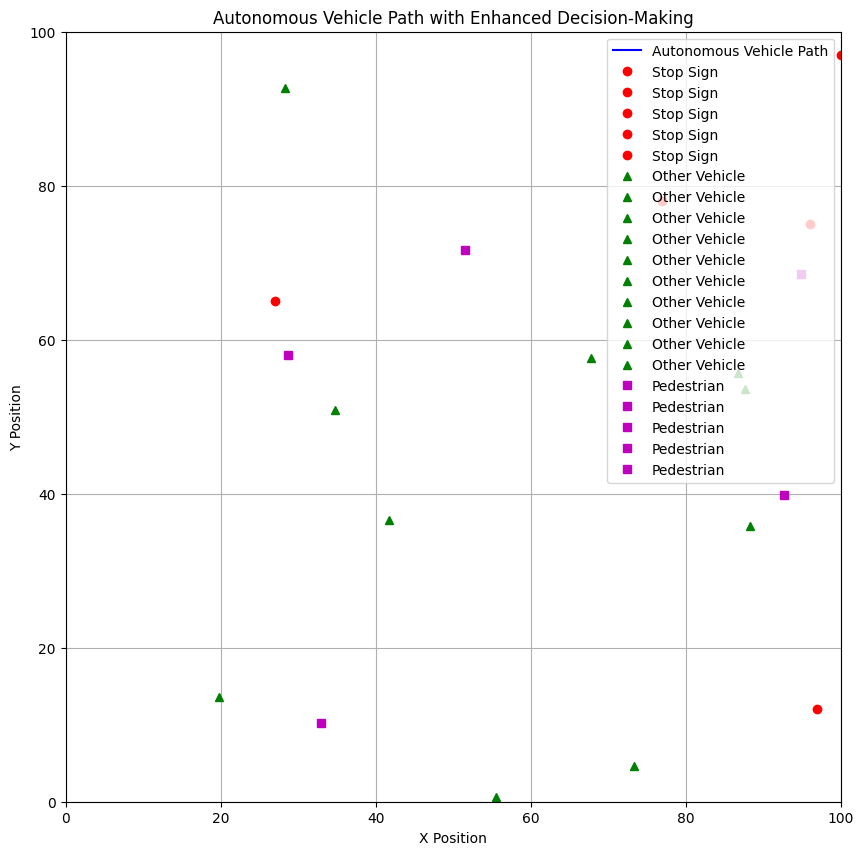

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with basic compliance to traffic rules."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):  # Checking for Vehicle instance
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):  # Checking for Pedestrian instance
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

    def make_decision(self):
        """Make decisions based on the current environment and sensor data."""
        for data in self.lidar_data:
            if data["type"] == "pedestrian":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    print("Yielding to pedestrian.")
                    self.apply_brakes()  # Yield to pedestrian
                    return
            elif data["type"] == "vehicle":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    print("Avoiding vehicle: applying brakes.")
                    self.apply_brakes()  # Avoid collision with another vehicle
                    return

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:  # Chance to jaywalk
            self.position[0] += uniform(-1, 1)  # Move left or right randomly
            self.position[1] += uniform(-1, 1)  # Move up or down randomly
            print("Pedestrian jaywalking!")
        else:
            # Normal random walk
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)  # Use Vehicle class for traffic vehicles
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Make decisions based on the current environment
    autonomous_vehicle.make_decision()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()  # Call move_randomly on Vehicle instances

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian")

plt.title("Autonomous Vehicle Path with Enhanced Decision-Making")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!


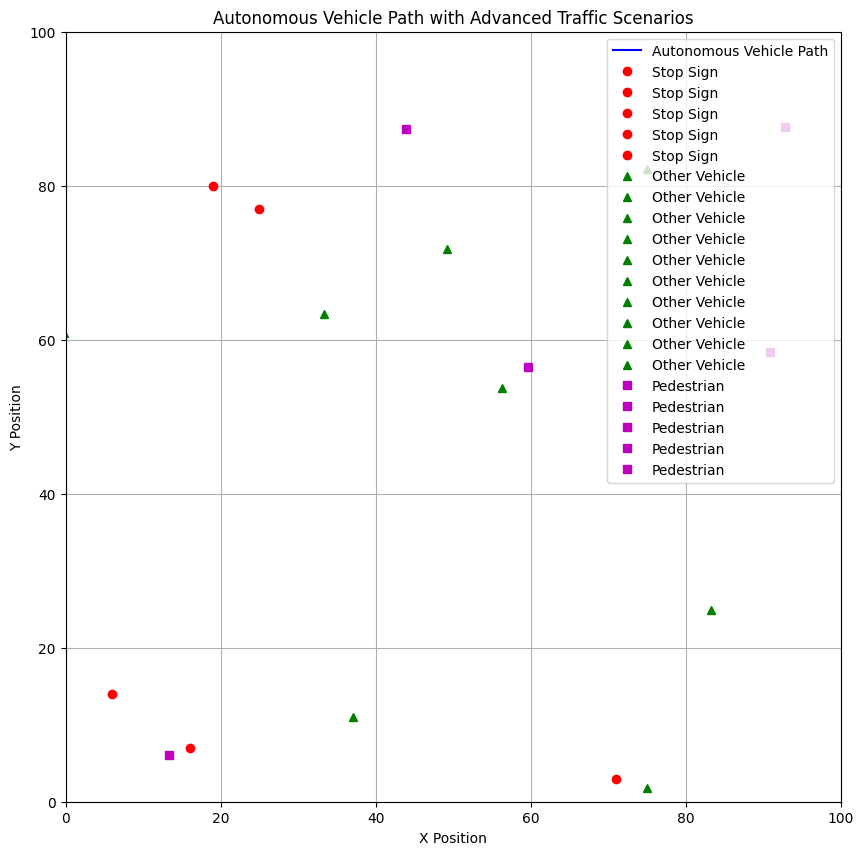

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform, choice

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking
U_TURN_CHANCE = 0.1  # Chance of a vehicle making a U-turn

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with basic compliance to traffic rules."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):  # Checking for Vehicle instance
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):  # Checking for Pedestrian instance
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

    def make_decision(self):
        """Make decisions based on the current environment and sensor data."""
        for data in self.lidar_data:
            if data["type"] == "pedestrian":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    print("Yielding to pedestrian.")
                    self.apply_brakes()  # Yield to pedestrian
                    return
            elif data["type"] == "vehicle":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    print("Avoiding vehicle: applying brakes.")
                    self.apply_brakes()  # Avoid collision with another vehicle
                    return

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:  # Chance to jaywalk
            self.position[0] += uniform(-1, 1)  # Move left or right randomly
            self.position[1] += uniform(-1, 1)  # Move up or down randomly
            print("Pedestrian jaywalking!")
        else:
            # Normal random walk
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

    def make_uturn(self):
        """Make a U-turn at random intervals."""
        if uniform(0, 1) < U_TURN_CHANCE:
            print("Vehicle making a U-turn!")
            self.position[0] += uniform(-5, 5)  # Move back in the opposite direction
            self.position[1] += uniform(-5, 5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)  # Use Vehicle class for traffic vehicles
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Make decisions based on the current environment
    autonomous_vehicle.make_decision()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()  # Call move_randomly on Vehicle instances
        vehicle.make_uturn()  # Randomly decide to make a U-turn

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path")

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian")

plt.title("Autonomous Vehicle Path with Advanced Traffic Scenarios")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Yielding to pedestrian.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Yielding to pedestrian.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Yielding to pedestrian.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Yielding to pedestrian.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Yielding to pedest

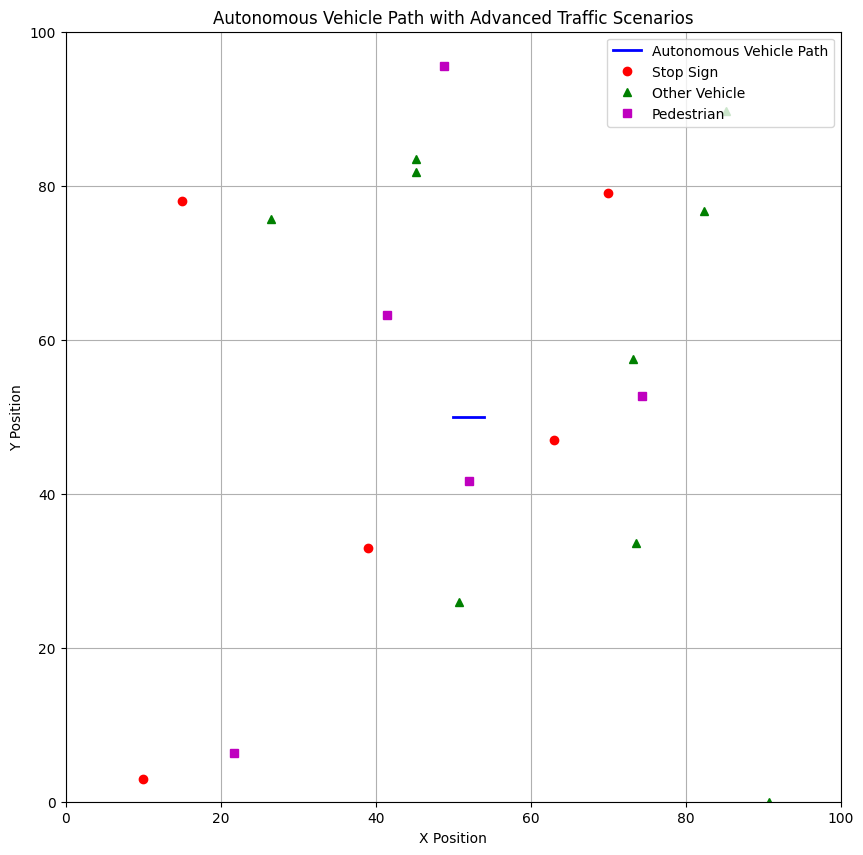

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform, choice

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking
U_TURN_CHANCE = 0.1  # Chance of a vehicle making a U-turn

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with basic compliance to traffic rules."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

    def make_decision(self):
        """Make decisions based on the current environment and sensor data."""
        for data in self.lidar_data:
            if data["type"] == "pedestrian":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    print("Yielding to pedestrian.")
                    self.apply_brakes()  # Yield to pedestrian
                    return
            elif data["type"] == "vehicle":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    print("Avoiding vehicle: applying brakes.")
                    self.apply_brakes()  # Avoid collision with another vehicle
                    return

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:
            self.position[0] += uniform(-1, 1)
            self.position[1] += uniform(-1, 1)
            print("Pedestrian jaywalking!")
        else:
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

    def make_uturn(self):
        """Make a U-turn at random intervals."""
        if uniform(0, 1) < U_TURN_CHANCE:
            print("Vehicle making a U-turn!")
            self.position[0] += uniform(-5, 5)
            self.position[1] += uniform(-5, 5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Make decisions based on the current environment
    autonomous_vehicle.make_decision()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()
        vehicle.make_uturn()  # Randomly decide to make a U-turn

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path", linewidth=2)

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign" if sign == environment.traffic_signs[0] else "")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle" if vehicle == environment.vehicles[0] else "")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian" if pedestrian == environment.pedestrians[0] else "")

plt.title("Autonomous Vehicle Path with Advanced Traffic Scenarios")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-tu

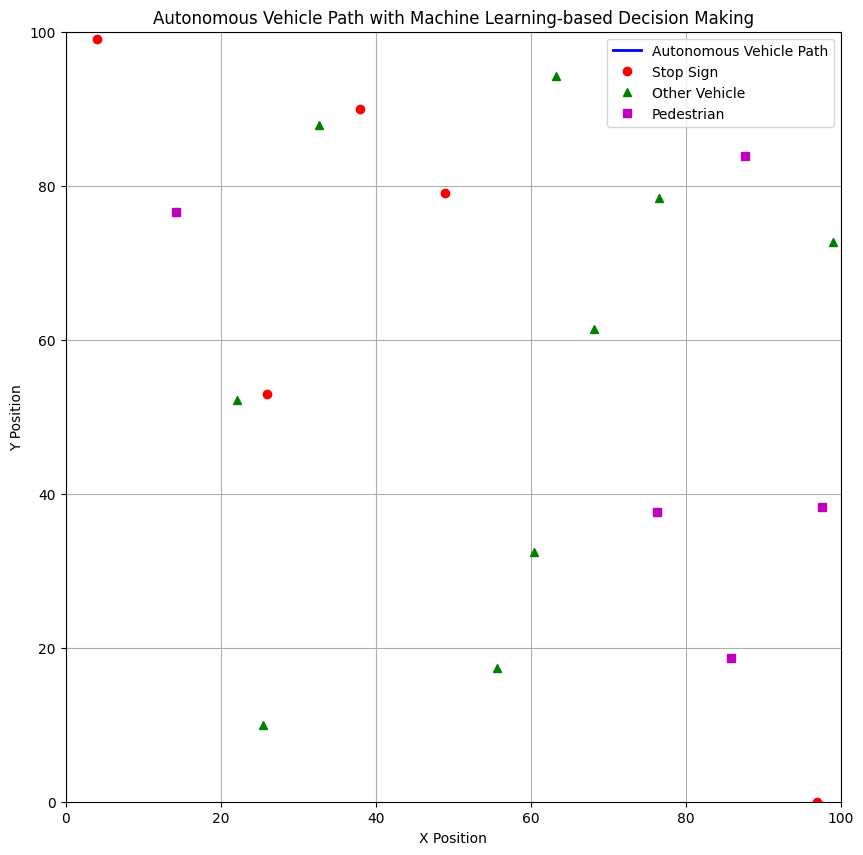

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform, choice
from collections import defaultdict

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking
U_TURN_CHANCE = 0.1  # Chance of a vehicle making a U-turn

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with advanced decision-making capabilities."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []
        self.state_action_values = defaultdict(float)  # State-action value pairs for Q-learning

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

    def make_decision(self):
        """Make decisions based on the current environment and sensor data."""
        state = self.get_current_state()
        action = self.choose_action(state)

        if action == "yield":
            for data in self.lidar_data:
                if data["type"] == "pedestrian":
                    if data["distance"] < STOP_SIGN_DISTANCE:
                        print("Yielding to pedestrian.")
                        self.apply_brakes()  # Yield to pedestrian
                        return
        elif action == "avoid":
            for data in self.lidar_data:
                if data["type"] == "vehicle":
                    if data["distance"] < STOP_SIGN_DISTANCE:
                        print("Avoiding vehicle: applying brakes.")
                        self.apply_brakes()  # Avoid collision with another vehicle
                        return

        # Default action: move forward
        self.move_forward()

        # Update Q-values
        reward = self.get_reward(state, action)
        self.update_q_values(state, action, reward)

    def get_current_state(self):
        """Determine the current state based on lidar data."""
        state_info = {
            "near_stop_sign": any(d["type"] == "stop" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
            "near_vehicle": any(d["type"] == "vehicle" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
            "near_pedestrian": any(d["type"] == "pedestrian" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
        }
        return tuple(state_info.values())

    def choose_action(self, state):
        """Choose an action based on the current state (Q-learning)."""
        if uniform(0, 1) < 0.1:  # Explore
            return choice(["yield", "avoid", "move_forward"])
        else:  # Exploit
            return max(["yield", "avoid", "move_forward"], key=lambda action: self.state_action_values[(state, action)])

    def get_reward(self, state, action):
        """Define a simple reward structure for the vehicle."""
        if action == "yield" and state[2]:  # Near pedestrian
            return 10  # Positive reward for yielding
        elif action == "avoid" and state[1]:  # Near vehicle
            return 10  # Positive reward for avoiding
        elif action == "move_forward" and not (state[0] or state[1] or state[2]):
            return 1  # Small positive reward for moving forward safely
        return -5  # Negative reward for any other action

    def update_q_values(self, state, action, reward):
        """Update the Q-values based on the action taken and the received reward."""
        next_state = self.get_current_state()
        self.state_action_values[(state, action)] += 0.1 * (reward + 0.9 * max(self.state_action_values[(next_state, a)] for a in ["yield", "avoid", "move_forward"]) - self.state_action_values[(state, action)])

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:
            self.position[0] += uniform(-1, 1)
            self.position[1] += uniform(-1, 1)
            print("Pedestrian jaywalking!")
        else:
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

    def make_uturn(self):
        """Make a U-turn at random intervals."""
        if uniform(0, 1) < U_TURN_CHANCE:
            print("Vehicle making a U-turn!")
            self.position[0] += uniform(-5, 5)
            self.position[1] += uniform(-5, 5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Make decisions based on the current environment
    autonomous_vehicle.make_decision()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()
        vehicle.make_uturn()

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path", linewidth=2)

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign" if sign == environment.traffic_signs[0] else "")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle" if vehicle == environment.vehicles[0] else "")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian" if pedestrian == environment.pedestrians[0] else "")

plt.title("Autonomous Vehicle Path with Machine Learning-based Decision Making")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Braking: stopping the vehicle.
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Braking: stopping the vehicle.
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Vehicle making a U-turn!
Braking: stopping the vehicle.
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Avoiding vehicl

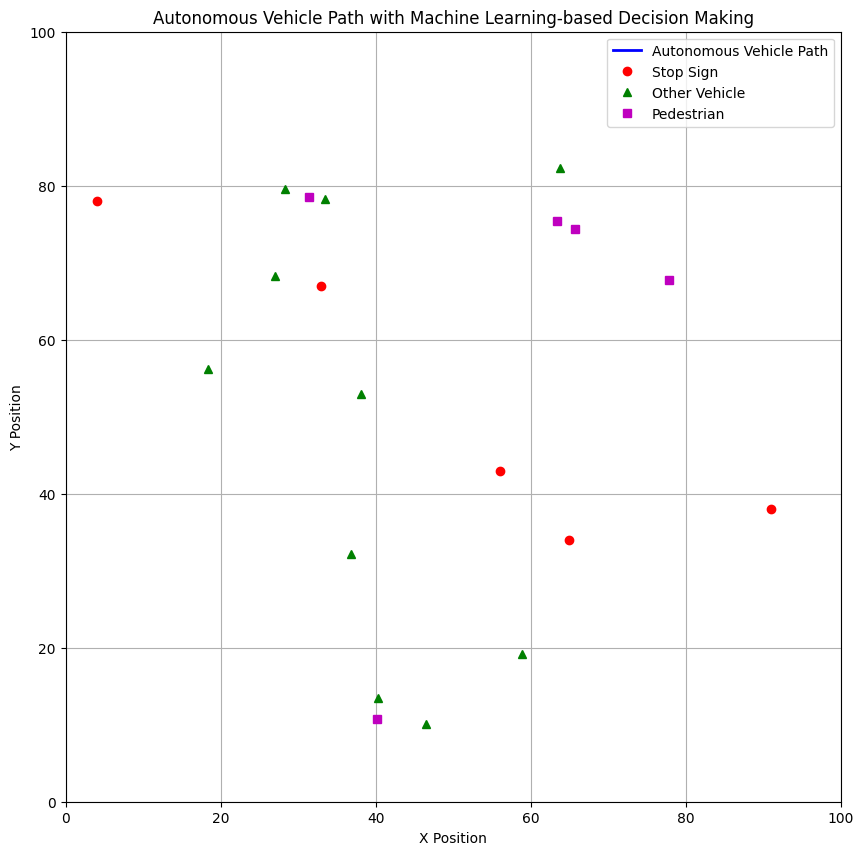

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform, choice
from collections import defaultdict

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking
U_TURN_CHANCE = 0.1  # Chance of a vehicle making a U-turn

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with advanced decision-making capabilities."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []
        self.state_action_values = defaultdict(float)  # State-action value pairs for Q-learning

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

    def make_decision(self):
        """Make decisions based on the current environment and sensor data."""
        state = self.get_current_state()
        action = self.choose_action(state)

        if action == "yield":
            for data in self.lidar_data:
                if data["type"] == "pedestrian":
                    if data["distance"] < STOP_SIGN_DISTANCE:
                        print("Yielding to pedestrian.")
                        self.apply_brakes()  # Yield to pedestrian
                        return
        elif action == "avoid":
            for data in self.lidar_data:
                if data["type"] == "vehicle":
                    if data["distance"] < STOP_SIGN_DISTANCE:
                        print("Avoiding vehicle: applying brakes.")
                        self.apply_brakes()  # Avoid collision with another vehicle
                        return

        # Default action: move forward
        self.move_forward()

        # Update Q-values
        reward = self.get_reward(state, action)
        self.update_q_values(state, action, reward)

    def get_current_state(self):
        """Determine the current state based on lidar data."""
        state_info = {
            "near_stop_sign": any(d["type"] == "stop" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
            "near_vehicle": any(d["type"] == "vehicle" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
            "near_pedestrian": any(d["type"] == "pedestrian" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
        }
        return tuple(state_info.values())

    def choose_action(self, state):
        """Choose an action based on the current state (Q-learning)."""
        if uniform(0, 1) < 0.1:  # Explore
            return choice(["yield", "avoid", "move_forward"])
        else:  # Exploit
            return max(["yield", "avoid", "move_forward"], key=lambda action: self.state_action_values[(state, action)])

    def get_reward(self, state, action):
        """Define a simple reward structure for the vehicle."""
        if action == "yield" and state[2]:  # Near pedestrian
            return 10  # Positive reward for yielding
        elif action == "avoid" and state[1]:  # Near vehicle
            return 10  # Positive reward for avoiding
        elif action == "move_forward" and not (state[0] or state[1] or state[2]):
            return 1  # Small positive reward for moving forward safely
        return -5  # Negative reward for any other action

    def update_q_values(self, state, action, reward):
        """Update the Q-values based on the action taken and the received reward."""
        next_state = self.get_current_state()
        self.state_action_values[(state, action)] += 0.1 * (reward + 0.9 * max(self.state_action_values[(next_state, a)] for a in ["yield", "avoid", "move_forward"]) - self.state_action_values[(state, action)])

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:
            self.position[0] += uniform(-1, 1)
            self.position[1] += uniform(-1, 1)
            print("Pedestrian jaywalking!")
        else:
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

    def make_uturn(self):
        """Make a U-turn at random intervals."""
        if uniform(0, 1) < U_TURN_CHANCE:
            print("Vehicle making a U-turn!")
            self.position[0] += uniform(-5, 5)
            self.position[1] += uniform(-5, 5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Make decisions based on the current environment
    autonomous_vehicle.make_decision()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()
        vehicle.make_uturn()

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path", linewidth=2)

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign" if sign == environment.traffic_signs[0] else "")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle" if vehicle == environment.vehicles[0] else "")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian" if pedestrian == environment.pedestrians[0] else "")

plt.title("Autonomous Vehicle Path with Machine Learning-based Decision Making")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Vehicle making a U-turn!
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Vehicle making a U-turn!
Vehicle making a U-turn!
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Pedestrian jaywalking!
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Avoiding vehicle: applying brakes.
Braking: stopping the vehicle.
Pedestrian jaywalking!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Vehicle making a U-turn!
Pedestrian jaywalking!
Braking: stopping the vehicle.
Pedestrian jaywalking!
Braking: stopping the vehicle.
Vehicle making a U-turn!
Braking: stoppi

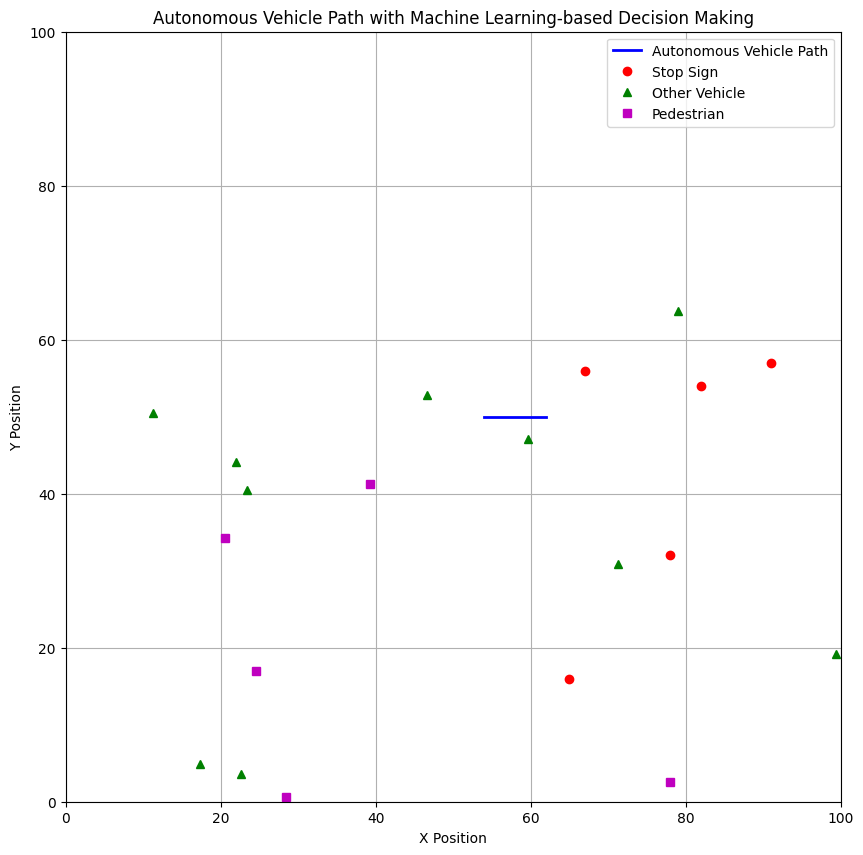

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform, choice
from collections import defaultdict

# Constants for simulation
ENV_SIZE = 100  # Size of the environment in arbitrary units
NUM_VEHICLES = 10  # Number of other vehicles in the environment
NUM_PEDESTRIANS = 5  # Number of pedestrians in the environment
LIDAR_RANGE = 20  # Range of the simulated LiDAR in units
SPEED_LIMIT = 2.0  # Speed limit for autonomous vehicles
STOP_SIGN_DISTANCE = 10  # Distance at which the vehicle detects a stop sign
PEDESTRIAN_JAYWALK_CHANCE = 0.2  # Chance of a pedestrian jaywalking
U_TURN_CHANCE = 0.1  # Chance of a vehicle making a U-turn

class TrafficSign:
    """Class to represent traffic signs in the environment."""

    def __init__(self, position, sign_type):
        self.position = np.array(position, dtype=float)
        self.sign_type = sign_type  # 'stop', 'speed_limit', etc.

class AutonomousVehicle:
    """Simulate an autonomous vehicle with advanced decision-making capabilities."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)
        self.speed = 0.0  # Initial speed
        self.lidar_data = []
        self.state_action_values = defaultdict(float)  # State-action value pairs for Q-learning

    def read_lidar(self, objects):
        """Simulate a LiDAR scan to detect objects within range."""
        self.lidar_data = []
        for obj in objects:
            distance = np.linalg.norm(self.position - obj.position)
            if distance <= LIDAR_RANGE:
                if isinstance(obj, TrafficSign):
                    self.lidar_data.append({
                        "type": obj.sign_type,
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Vehicle):
                    self.lidar_data.append({
                        "type": "vehicle",
                        "position": obj.position,
                        "distance": distance
                    })
                elif isinstance(obj, Pedestrian):
                    self.lidar_data.append({
                        "type": "pedestrian",
                        "position": obj.position,
                        "distance": distance
                    })

    def move_forward(self):
        """Move the autonomous vehicle forward while adhering to speed limits."""
        if self.speed > SPEED_LIMIT:
            self.speed = SPEED_LIMIT  # Enforce speed limit
        movement = np.array([self.speed, 0])  # Move horizontally for simplicity
        self.position += movement

    def apply_brakes(self):
        """Stop the vehicle if necessary."""
        print("Braking: stopping the vehicle.")
        self.speed = 0.0

    def update_speed(self):
        """Update speed based on lidar data (e.g., stopping for a stop sign)."""
        for data in self.lidar_data:
            if data["type"] == "stop":
                if data["distance"] < STOP_SIGN_DISTANCE:
                    self.apply_brakes()
                else:
                    self.speed = SPEED_LIMIT  # Resume speed if not near a stop sign

    def make_decision(self):
        """Make decisions based on the current environment and sensor data."""
        state = self.get_current_state()
        action = self.choose_action(state)

        if action == "yield":
            for data in self.lidar_data:
                if data["type"] == "pedestrian":
                    if data["distance"] < STOP_SIGN_DISTANCE:
                        print("Yielding to pedestrian.")
                        self.apply_brakes()  # Yield to pedestrian
                        return
        elif action == "avoid":
            for data in self.lidar_data:
                if data["type"] == "vehicle":
                    if data["distance"] < STOP_SIGN_DISTANCE:
                        print("Avoiding vehicle: applying brakes.")
                        self.apply_brakes()  # Avoid collision with another vehicle
                        return

        # Default action: move forward
        self.move_forward()

        # Update Q-values
        reward = self.get_reward(state, action)
        self.update_q_values(state, action, reward)

    def get_current_state(self):
        """Determine the current state based on lidar data."""
        state_info = {
            "near_stop_sign": any(d["type"] == "stop" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
            "near_vehicle": any(d["type"] == "vehicle" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
            "near_pedestrian": any(d["type"] == "pedestrian" and d["distance"] < STOP_SIGN_DISTANCE for d in self.lidar_data),
        }
        return tuple(state_info.values())

    def choose_action(self, state):
        """Choose an action based on the current state (Q-learning)."""
        if uniform(0, 1) < 0.1:  # Explore
            return choice(["yield", "avoid", "move_forward"])
        else:  # Exploit
            return max(["yield", "avoid", "move_forward"], key=lambda action: self.state_action_values[(state, action)])

    def get_reward(self, state, action):
        """Define a simple reward structure for the vehicle."""
        if action == "yield" and state[2]:  # Near pedestrian
            return 10  # Positive reward for yielding
        elif action == "avoid" and state[1]:  # Near vehicle
            return 10  # Positive reward for avoiding
        elif action == "move_forward" and not (state[0] or state[1] or state[2]):
            return 1  # Small positive reward for moving forward safely
        return -5  # Negative reward for any other action

    def update_q_values(self, state, action, reward):
        """Update the Q-values based on the action taken and the received reward."""
        next_state = self.get_current_state()
        self.state_action_values[(state, action)] += 0.1 * (reward + 0.9 * max(self.state_action_values[(next_state, a)] for a in ["yield", "avoid", "move_forward"]) - self.state_action_values[(state, action)])

class Pedestrian:
    """Simulate a pedestrian in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the pedestrian, potentially jaywalking."""
        if uniform(0, 1) < PEDESTRIAN_JAYWALK_CHANCE:
            self.position[0] += uniform(-1, 1)
            self.position[1] += uniform(-1, 1)
            print("Pedestrian jaywalking!")
        else:
            self.position[0] += uniform(-0.5, 0.5)
            self.position[1] += uniform(-0.5, 0.5)

class Vehicle:
    """Simulate another vehicle in the environment."""

    def __init__(self, position):
        self.position = np.array(position, dtype=float)

    def move_randomly(self):
        """Randomly move the vehicle."""
        self.position[0] += uniform(-0.5, 0.5)
        self.position[1] += uniform(-0.5, 0.5)

    def make_uturn(self):
        """Make a U-turn at random intervals."""
        if uniform(0, 1) < U_TURN_CHANCE:
            print("Vehicle making a U-turn!")
            self.position[0] += uniform(-5, 5)
            self.position[1] += uniform(-5, 5)

class UrbanEnvironment:
    """Simulate a basic urban environment with traffic signs and vehicles."""

    def __init__(self, num_vehicles, num_pedestrians):
        self.vehicles = []
        self.traffic_signs = []
        self.pedestrians = []
        self.spawn_traffic(num_vehicles)
        self.spawn_traffic_signs()
        self.spawn_pedestrians(num_pedestrians)

    def spawn_traffic(self, num):
        """Spawn vehicles at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            vehicle = Vehicle(position)
            self.vehicles.append(vehicle)

    def spawn_traffic_signs(self):
        """Spawn some traffic signs (stop signs) at random positions."""
        for _ in range(5):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            stop_sign = TrafficSign(position, "stop")
            self.traffic_signs.append(stop_sign)

    def spawn_pedestrians(self, num):
        """Spawn pedestrians at random positions within the environment."""
        for _ in range(num):
            position = np.array([randint(0, ENV_SIZE), randint(0, ENV_SIZE)])
            pedestrian = Pedestrian(position)
            self.pedestrians.append(pedestrian)

    def get_all_objects(self):
        """Return all traffic signs, vehicles, and pedestrians in the environment."""
        return self.traffic_signs + self.vehicles + self.pedestrians

# Initialize the environment with traffic signs, vehicles, and pedestrians
environment = UrbanEnvironment(NUM_VEHICLES, NUM_PEDESTRIANS)

# Simulation loop for vehicle movement and traffic compliance
num_steps = 50  # Number of steps in the simulation
position_log = []  # Log positions for visualization

# Initialize one autonomous vehicle
autonomous_vehicle = AutonomousVehicle(position=(ENV_SIZE // 2, ENV_SIZE // 2))

for _ in range(num_steps):
    # Get updated object positions
    objects = environment.get_all_objects()

    # Read lidar data for the autonomous vehicle
    autonomous_vehicle.read_lidar(objects)

    # Update speed based on the traffic signs detected
    autonomous_vehicle.update_speed()

    # Make decisions based on the current environment
    autonomous_vehicle.make_decision()

    # Move pedestrians and other vehicles randomly
    for pedestrian in environment.pedestrians:
        pedestrian.move_randomly()
    for vehicle in environment.vehicles:
        vehicle.move_randomly()
        vehicle.make_uturn()

    # Move forward
    autonomous_vehicle.move_forward()

    # Log current position
    position_log.append(autonomous_vehicle.position.copy())

# Convert logs to a 2D array for easier plotting
position_log = np.array(position_log)

# Visualization of the environment with traffic signs and the autonomous vehicle path
plt.figure(figsize=(10, 10))
plt.xlim(0, ENV_SIZE)
plt.ylim(0, ENV_SIZE)
plt.plot(position_log[:, 0], position_log[:, 1], 'b-', label="Autonomous Vehicle Path", linewidth=2)

# Plot traffic signs in the environment
for sign in environment.traffic_signs:
    plt.plot(sign.position[0], sign.position[1], 'ro', label="Stop Sign" if sign == environment.traffic_signs[0] else "")

# Plot the vehicles
for vehicle in environment.vehicles:
    plt.plot(vehicle.position[0], vehicle.position[1], 'g^', label="Other Vehicle" if vehicle == environment.vehicles[0] else "")

# Plot pedestrians
for pedestrian in environment.pedestrians:
    plt.plot(pedestrian.position[0], pedestrian.position[1], 'ms', label="Pedestrian" if pedestrian == environment.pedestrians[0] else "")

plt.title("Autonomous Vehicle Path with Machine Learning-based Decision Making")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right")
plt.grid()
plt.show()
